# User Review Feedback Classifier
Developed with Scikit-learn, Pandas, etc.

Based on the following [tutorial](https://www.youtube.com/watch?v=M9Itm95JzL0), from Keith Galli.

Reviews retrieved from the following [Amazon user reviews dataset](https://nijianmo.github.io/amazon/index.html).

### 1. Load Data

In [1]:
import pandas as pd
import numpy as np

# Load raw data
raw_df = pd.read_json("./data/feedback/Reviews_25k.json")
raw_df

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"01 1, 2014",A2JY90TWJY6JUN,0983429405,{'Format:': ' Kindle Edition'},M. Mander,I am enjoying this informative book and will c...,very useful book,1388534400,NaN,None
1,5,False,"10 1, 2014",A2X9MVOFF593CP,0373773846,{'Format:': ' Kindle Edition'},Stephanie,For the past several years Garth Duncan has ha...,An Author Who Makes You Root for the Villian!,1412121600,NaN,None
2,5,True,"10 9, 2014",A3BK2NSHZWNB7,1416567178,{'Format:': ' Mass Market Paperback'},BCS,Great story!,Five Stars,1412812800,NaN,None
3,5,True,"09 8, 2014",A11PTQ33D2V7FO,0891415440,{'Format:': ' Paperback'},Beverly Cobb,loved his speech at graduation - haven't had a...,loved his speech at graduation - haven't had a...,1410134400,NaN,None
4,5,True,"12 23, 2014",A31U1BI272EHBQ,0230531423,{'Format:': ' Kindle Edition'},tom,Excellent. Fast moving novel with a lot of twi...,Five Stars,1419292800,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,True,"08 9, 2014",A3A7DII49DAMF,0143127500,{'Format:': ' Kindle Edition'},Larry Hoffer,"I first stumbled onto Jojo Moyes last year, wh...","Sweet, endearing, and fun...",1407542400,3.0,None
24996,5,False,"03 3, 2014",A2BRDQ1M7U95YL,1781852367,{'Format:': ' Kindle Edition'},Island River Scribe,"NOW Donovan Creed and his girlfriend, Rachel,...",The Power To Ease Pain,1393804800,NaN,None
24997,5,False,"08 21, 2014",A2VPOGO3FBIPXP,0312556179,{'Format:': ' Paperback'},tmj,Great!,Five Stars,1408579200,NaN,None
24998,4,True,"12 9, 2014",A19SGYGWXMBBOH,080543092X,{'Format:': ' Paperback'},Howard,Excellent,Four Stars,1418083200,NaN,None


In [2]:
# Filter necessary columns
df = raw_df[["reviewText", "overall"]]
df

,reviewText,overall
0,I am enjoying this informative book and will c...,5
1,For the past several years Garth Duncan has ha...,5
2,Great story!,5
3,loved his speech at graduation - haven't had a...,5
4,Excellent. Fast moving novel with a lot of twi...,5
...,...,...
24995,"I first stumbled onto Jojo Moyes last year, wh...",4
24996,"NOW Donovan Creed and his girlfriend, Rachel,...",5
24997,Great!,5
24998,Excellent,4


### 2. Prepare Data

In [7]:
# Add feedback classification column
pd.options.mode.chained_assignment = None # Hide warning

conditions = [
    df["overall"] <= 2,
    df["overall"] == 3,
    df["overall"] >= 4
]

classes = [
    "NEGATIVE",
    "NEUTRAL",
    "POSITIVE"
]

df["feedback"] = np.select(conditions, classes)
df

,reviewText,overall,feedback
0,I am enjoying this informative book and will c...,5,POSITIVE
1,For the past several years Garth Duncan has ha...,5,POSITIVE
2,Great story!,5,POSITIVE
3,loved his speech at graduation - haven't had a...,5,POSITIVE
4,Excellent. Fast moving novel with a lot of twi...,5,POSITIVE
...,...,...,...
24995,"I first stumbled onto Jojo Moyes last year, wh...",4,POSITIVE
24996,"NOW Donovan Creed and his girlfriend, Rachel,...",5,POSITIVE
24997,Great!,5,POSITIVE
24998,Excellent,4,POSITIVE


In [8]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

split_seed = 10
train, test = train_test_split(df, test_size=0.33, random_state=split_seed)

print("Training Set Length:", len(train))
print("Test Set Length:", len(test))

Training Set Length: 16750
Test Set Length: 8250


In [9]:
# Seperate features from labels
train_x = train[["reviewText"]]
train_y = train[["feedback"]]

test_x = test[["reviewText"]]
test_y = test[["feedback"]]

### 3. Text Vectorization

In [10]:
# Tokenize text into bags of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x["reviewText"].values.astype('U'))
test_x_vectors = vectorizer.transform(test_x["reviewText"].values.astype('U'))

### 4. Training

#### 4.1. Linear SVM

In [14]:
from sklearn import svm

clf_svm = svm.SVC(kernel="linear")

clf_svm.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_svm_prediction = clf_svm.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_svm_prediction[0])

Test Review: Thought it would be general rather than specific as to Porter's part  and his bias. But was interesting and well written.
Prediction: NEUTRAL


#### 4.2. Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier()

clf_tree.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_tree_prediction = clf_tree.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_tree_prediction[0])

Test Review: Thought it would be general rather than specific as to Porter's part  and his bias. But was interesting and well written.
Prediction: NEUTRAL


#### 4.3. Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()

clf_nb.fit(train_x_vectors.toarray(), train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_nb_prediction = clf_nb.predict(test_x_vectors[0].toarray())

print("Test Review:", test_review)
print("Prediction:", clf_nb_prediction[0])

Test Review: Thought it would be general rather than specific as to Porter's part  and his bias. But was interesting and well written.
Prediction: NEGATIVE


#### 4.4. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression(max_iter=1000)

clf_log.fit(train_x_vectors, train_y.values.ravel())

test_review = test_x.iloc[0].values[0]
clf_log_prediction = clf_log.predict(test_x_vectors[0])

print("Test Review:", test_review)
print("Prediction:", clf_log_prediction[0])

Test Review: Thought it would be general rather than specific as to Porter's part  and his bias. But was interesting and well written.
Prediction: NEUTRAL


### 5. Evaluation

In [18]:
accuracies = [
    ["SVM", clf_svm.score(test_x_vectors, test_y)],
    ["Decision Tree", clf_tree.score(test_x_vectors, test_y)],
    ["Naive Bayes", clf_nb.score(test_x_vectors.toarray(), test_y)],
    ["Logistic Regression", clf_log.score(test_x_vectors, test_y)],
]

pd.DataFrame(data=accuracies, columns=["Classifier", "Accuracy"])

,Classifier,Accuracy
0,SVM,0.639847
1,Decision Tree,0.481481
2,Naive Bayes,0.420817
3,Logistic Regression,0.658365


In [19]:
from sklearn.metrics import f1_score

f1_svm = f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
f1_tree = f1_score(test_y, clf_tree.predict(test_x_vectors), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
f1_nb = f1_score(test_y, clf_nb.predict(test_x_vectors.toarray()), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])
f1_log = f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=["NEGATIVE", "NEUTRAL", "POSITIVE"])

f1_scores = [
    ["SVM", f1_svm[0], f1_svm[1], f1_svm[2]],
    ["Decision Tree", f1_tree[0], f1_tree[1], f1_tree[2]],
    ["Naive Bayes", f1_nb[0], f1_nb[1], f1_nb[2]],
    ["Logistic Regression", f1_log[0], f1_log[1], f1_log[2]],
]

pd.DataFrame(data=f1_scores, columns=["Classifier", "F1(Negatives)", "F1(Neutrals)", "F1(Positives)"])

,Classifier,F1(Negatives),F1(Neutrals),F1(Positives)
0,SVM,0.646245,0.539033,0.737548
1,Decision Tree,0.467681,0.427203,0.550193
2,Naive Bayes,0.409990,0.368627,0.476108
3,Logistic Regression,0.668639,0.558852,0.745573


<AxesSubplot:>

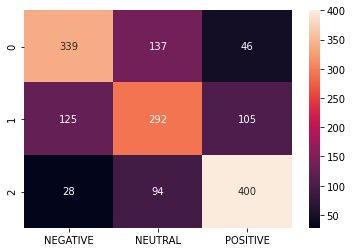

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib as plt

predictions = clf_log.predict(test_x_vectors)

labels = ["NEGATIVE", "NEUTRAL", "POSITIVE"]

cm = confusion_matrix(test_y, predictions, labels=labels)
df_cm = pd.DataFrame(cm, columns=labels)

sn.heatmap(df_cm, annot=True, fmt="d")

### 6. Improvements

#### 6.1. Even the number of labels
After running this improvement, run everything from section 3 to 5 to get the new results

In [11]:
# Count labels in each set
train_count = train_y.value_counts("feedback")
test_count = test_y.value_counts("feedback")

print("Label counts in Training Set:\n", train_count, "\n")
print("Label counts in Test Set:\n", test_count)

Label counts in Training Set:
 feedback
POSITIVE    14192
NEUTRAL      1536
NEGATIVE     1022
dtype: int64 

Label counts in Test Set:
 feedback
POSITIVE    7019
NEUTRAL      709
NEGATIVE     522
dtype: int64


In [12]:
# Clearly, there's way too many positive reviews. Let's even it out
def even_labels(df):
    positives = df[df["feedback"] == "POSITIVE"]
    neutrals = df[df["feedback"] == "NEUTRAL"]
    negatives = df[df["feedback"] == "NEGATIVE"]

    count_negatives = df.value_counts("feedback")[2]
    positives = positives[:count_negatives]
    neutrals = neutrals[:count_negatives]
    
    shrunk_df = positives.append(neutrals).append(negatives)
    
    shuffled_df = shrunk_df.sample(frac=1).reset_index(drop=True)
    
    return shuffled_df[["reviewText"]], shuffled_df[["feedback"]]

# The new training and test sets are ready for training
train_x, train_y = even_labels(train)
test_x, test_y = even_labels(test)

#### 6.2. Prioritize certain tokens
After running this improvement, run everything from section 4 and 5 to get the new results

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x["reviewText"].values.astype('U'))
test_x_vectors = vectorizer.transform(test_x["reviewText"].values.astype('U'))

#### 6.3. Apply Grid Search
After running this improvement, run everything from section 4 and 5 to get the new results

In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "kernel": ("linear", "rbf"),
    "C": (1,4,8,16,32)
}

svc = svm.SVC()
tuned_clf = GridSearchCV(svc, parameters, cv=5)
tuned_clf.fit(train_x_vectors, train_y.values.ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

### 7. Testing

In [23]:
new_examples = [
    "This book is amazing! 5 stars", 
    "Waste of time, don't buy this book", 
    "Meh, thought it would be better"
]

vectorized_examples = vectorizer.transform(new_examples)

clf_svm.predict(vectorized_examples)

array(['POSITIVE', 'NEGATIVE', 'NEUTRAL'], dtype=object)

### 8. Model Persistence

#### 8.1. Saving Model

In [22]:
import pickle

with open("./models/feedback_classifier.pkl", "wb") as f:
    pickle.dump(clf_svm, f)

#### 8.2. Loading Model

In [24]:
with open("./models/feedback_classifier.pkl", "rb") as f:
    loaded_clf = pickle.load(f)